In [1]:
import pandas as pd 
import os
import time
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
files=os.listdir(r"C:\Users\domet\Documents\ecommerce")

In [10]:
data = pd.read_csv(r"C:\Users\domet\Documents\ecommerce\data.csv", encoding='latin1')

In [37]:
# Check for null values
null_values = data.isnull().sum()

# Print the null values
print(null_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### DateTime adjustments

In [9]:
data_df = pd.DataFrame(data)
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
# Convert 'InvoiceDate' column to datetime
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])

# Extract date components for plotting
data_df['Date'] = data_df['InvoiceDate'].dt.date
data_df['Time'] = data_df['InvoiceDate'].dt.time

print(data_df['Date'])
print(data_df['Time'])

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Date, Length: 541909, dtype: object
0         08:26:00
1         08:26:00
2         08:26:00
3         08:26:00
4         08:26:00
            ...   
541904    12:50:00
541905    12:50:00
541906    12:50:00
541907    12:50:00
541908    12:50:00
Name: Time, Length: 541909, dtype: object


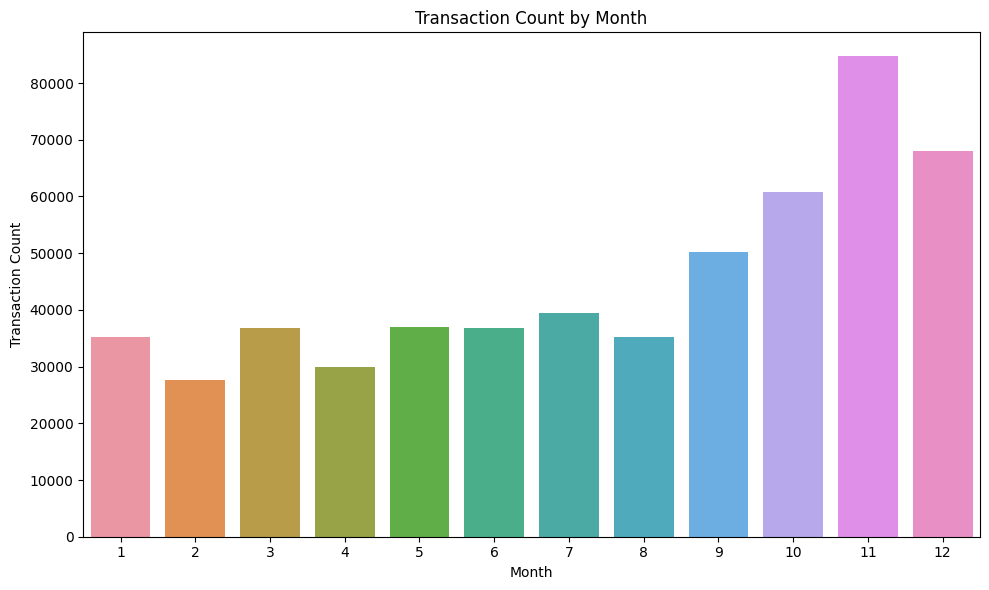

In [17]:
# Extract month from 'InvoiceDate'
data_df['Month'] = data_df['InvoiceDate'].dt.month

# Plot the counts of transactions by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=data_df)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')
plt.tight_layout()
plt.show()

* We can see that the store had the most sales towards the winter season.  
* Febuary had the lowest amount of sales.

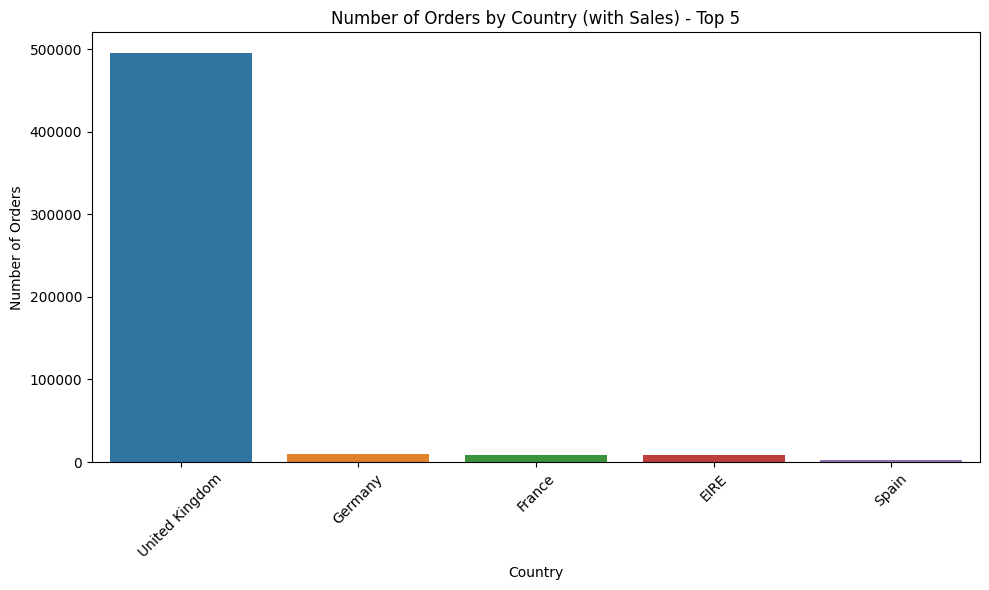

In [27]:
# Group the data by Country and count the number of invoices
country_invoices = data_df.groupby('Country')['InvoiceDate'].count().reset_index()

# Filter out countries with zero invoices (no sales)
country_invoices = country_invoices[country_invoices['InvoiceDate'] > 0]

# Sort the number of invoices in descending order
country_invoices = country_invoices.sort_values('InvoiceDate', ascending=False)

# Select the top 5 countries with the highest number of orders
top_countries = country_invoices.head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='InvoiceDate', data=top_countries)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Country (with Sales) - Top 5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* We can see United Kingdom had the most amount of sales

### Customers
 We saw earlier that the csv file had some customer info and time the customer ordered. We can use this info to get more information about customers

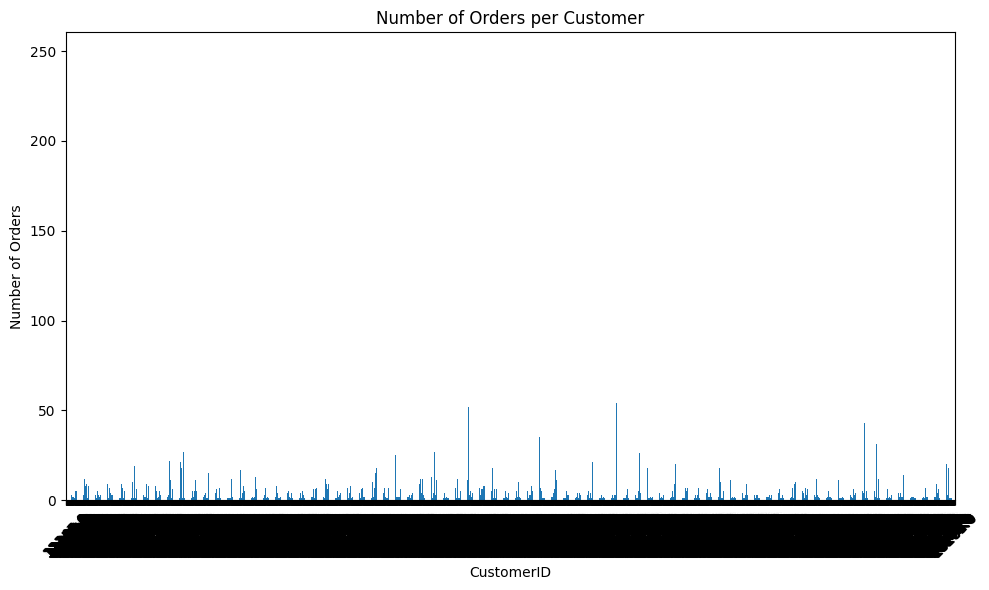

In [30]:
orders_per_customer = data_df.groupby('CustomerID')['InvoiceNo'].nunique()
orders_per_customer.head()

# Create the bar plot
plt.figure(figsize=(10, 6))
orders_per_customer.plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is too much info so we need to narrow it down

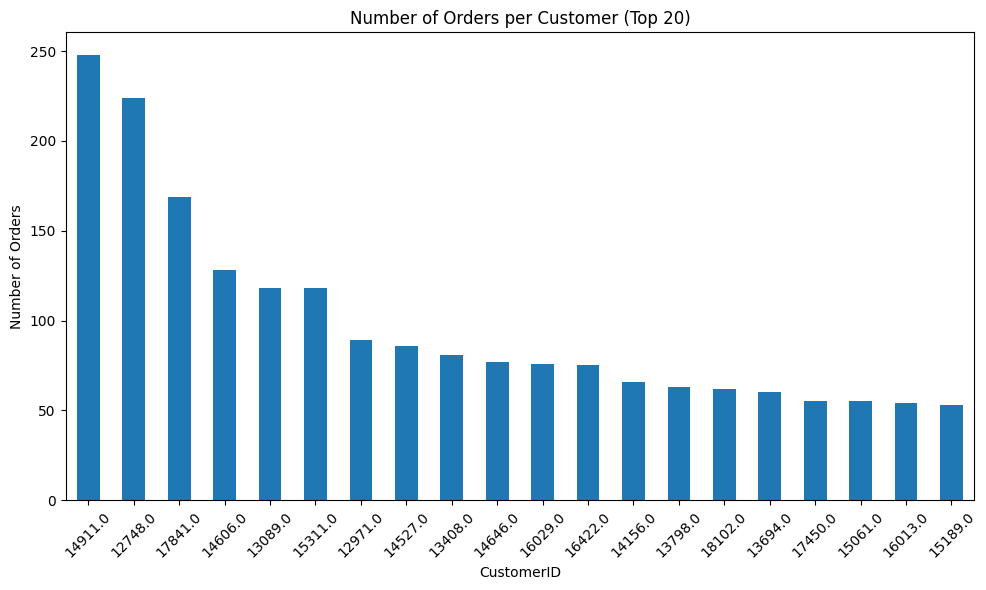

In [31]:
# Sort the customers by the number of orders in descending order
top_20_customers = orders_per_customer.sort_values(ascending=False).head(20)

# Create the bar plot for the top 20 customers
plt.figure(figsize=(10, 6))
top_20_customers.plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer (Top 20)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 * Customer 14911 has the most amount of orders but 12748 is a close second.
  

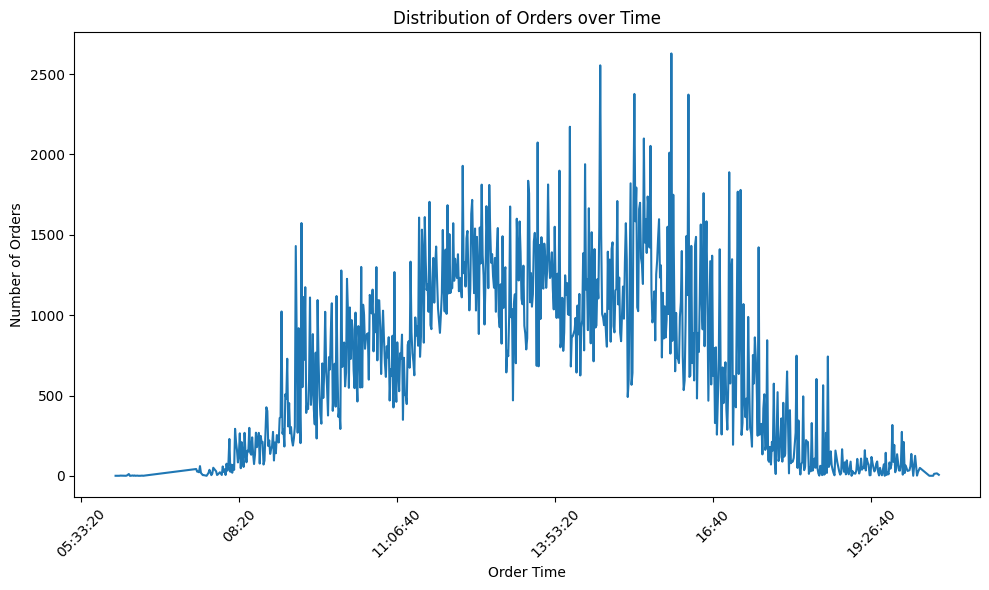

In [35]:
# Convert 'InvoiceDate' column to datetime
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])

# Extract the time component
data_df['OrderTime'] = data_df['InvoiceDate'].dt.time

# Count the number of orders for each unique order time
order_time_counts = data_df['OrderTime'].value_counts().sort_index()

# Plot the distribution of order times as a line chart
plt.figure(figsize=(10, 6))
order_time_counts.plot(kind='line')
plt.xlabel('Order Time')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Most orders were done between 11am and 4pm

In [39]:
# Group the data by 'CustomerID' and count the number of unique 'InvoiceNo' values
customer_orders = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Sort the customers based on the number of orders in descending order
customer_orders = customer_orders.sort_values(ascending=False)

# Print the customers with the most orders
print("Customers with the most orders:")
print(customer_orders.head())

Customers with the most orders:
CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
Name: InvoiceNo, dtype: int64


In [40]:
# Sort the customers based on the number of orders in descending order and select the top 20
top_customers = customer_orders.sort_values(ascending=False).head(20)

# Get the country information for the top customers
top_customers_info = data.loc[data['CustomerID'].isin(top_customers.index), ['CustomerID', 'Country']].drop_duplicates()

# Print the top 20 customers and their countries
print("Top 20 Customers and their Countries:")
print(top_customers_info)

Top 20 Customers and their Countries:
       CustomerID         Country
106       15311.0  United Kingdom
141       14527.0  United Kingdom
175       16029.0  United Kingdom
253       13408.0  United Kingdom
728       13694.0  United Kingdom
1016      12748.0  United Kingdom
1404      14911.0            EIRE
1441      17841.0  United Kingdom
2421      14606.0  United Kingdom
4439      15061.0  United Kingdom
4831      12971.0  United Kingdom
4884      14156.0            EIRE
4936      13798.0  United Kingdom
6604      16013.0  United Kingdom
7440      13089.0  United Kingdom
9741      16422.0  United Kingdom
14059     17450.0  United Kingdom
16425     18102.0  United Kingdom
37952     14646.0     Netherlands
52577     15189.0  United Kingdom


In [41]:
# Calculate the total spending for each customer
data['TotalSpending'] = data['Quantity'] * data['UnitPrice']
customer_spending = data.groupby('CustomerID')['TotalSpending'].sum()

# Sort the customers based on the total spending in descending order and select the top 20
top_customers = customer_spending.sort_values(ascending=False).head(20)

# Print the top 20 customers and their total spending
print("Top 20 Customers by Total Spending:")
print(top_customers)

Top 20 Customers by Total Spending:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
13089.0     57385.88
14096.0     57120.91
15061.0     54228.74
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     50862.44
14088.0     50415.49
17841.0     40340.78
13798.0     36351.42
Name: TotalSpending, dtype: float64
